<a href="https://colab.research.google.com/github/eonadler/Colab-Notebooks/blob/main/stream_viz_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stellar Stream VizLab Workshop

This workshop provides a hands-on introduction to the fascinating astronomical systems known as ***stellar streams***, many of which have been discovered in recent years near our own galaxy, the Milky Way.

To open the notebook, first start the browser, and then go to https://tinyurl.com/yuyp5bzr.

## How to use this notebook

Each block of code (or "cell") on this page runs Python code on the Google cloud. To run a cell, click anywhere inside of it then enter `shift`+`return`. Or, hover your mouse over the cell and click the "play" icon that appears at the top left. The cell is finished running when a small green check-mark appears at the top left.

**Remember to run every cell in order, even the ones that say "cell hidden"!**

## Setup

In [ ]:
!pip install gala
!pip install PyntCloud

import os
import gdown
import pickle
import pandas as pd
import numpy as np
from IPython.display import Video
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib as mpl
from ctypes import c_ubyte
import astropy.units as u
import numpy as np
import gala.potential as gp
import gala.dynamics as gd
from gala.dynamics import mockstream as ms
from gala.units import galactic
from pyntcloud import PyntCloud
import astropy.coordinates as coord
_ = coord.galactocentric_frame_defaults.set('v4.0')

%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('dark_background')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.3/346.3 kB 6.2 MB/s eta 0:00:00


In [ ]:
#Download stream data
gdown.download("https://drive.google.com/uc?id=1Alv1-8sJCyLTLFllErCx-k1cCIvi40Kq", quiet=True)
file = open("stream_dict.pkl",'rb')
stream_dict = pickle.load(file)
file.close()

If the cell above fails:

1. Go to: https://drive.google.com/file/d/1Alv1-8sJCyLTLFllErCx-k1cCIvi40Kq/view?usp=sharing

2. Click "download"

4. Click the "upload to session storage" icon on the top of the pane that appears

5. Upload the stream_dict.pkl file you downloaded

## Introduction

A stellar stream is a relatively long and thin group stars that originated from a common ancestor; most nearby stellar streams are the remains of small dwarf galaxies or star clusters that were torn apart as they orbited the Milky Way. The video below shows an example of how a particularly large stream around the Milky Way formed. For more background, check out [this Science article](https://www.science.org/content/article/streams-stars-reveal-galaxy-s-violent-history-and-perhaps-its-unseen-dark-matter).

To introduce how stellar streams form and evolve, we'll focus on three main concepts:

### 1. Galaxies form by eating smaller galaxies

Structures in our universe, like galaxies, form in a "bottom up" fashion through collisions of smaller galaxies.

[This video](https://drive.google.com/uc?export=view&id=1P8hCCOwoM2gc-QRExKkrJXCNtHGKfmVN) shows the formation of a single galaxy; as you'll see, it's built up of many smaller systems.

### 2. Streams are the remnants of small galaxies, after they have orbited around larger ones

As small galaxies are eaten by larger galaxies, they are stretched apart into long, thin structures known as "stellar streams."

This video shows the formation of a stellar stream as it orbits the Milky Way galaxy (which sits at the center of the movie, although we can only see its gravitational effects).

In [ ]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/WW-ps2zg89s" frameborder="0" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### 3. Streams form because of tidal gravitational forces

As a small galaxy falls into a larger one, there is more of a gravitational pull on the side of the small galaxy closer to the larger one; this "tidal force" is what causes the small galaxy to be stretched apart.

This video shows an example of tidal gravitational forces for the moon and Earth.

In [ ]:
#Placeholder video
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/l37ofe9haMU" frameborder="0" allowfullscreen></iframe>')

## Exercise: Generate your own stream for VizLab

### 1. Generate a Standard Stream


The following cells set up a stellar stream and then evolve it, as it orbits around the Milky Way. The green text in each cell explains what the parameter(s) mean.

In [ ]:
#Stream parameters
adjustable_params = {}

#These set the stream's x, y, and z position today, relative to the Milky Way center, in units of kiloparsecs
adjustable_params['x'] = 10.
adjustable_params['y'] = 0.
adjustable_params['z'] = 0.

#These set the stream's velocities in the x, y, and z directions today, relative to the Milky Way center, in units of kilometers/second
adjustable_params['vx'] = 0.
adjustable_params['vy'] = 170.
adjustable_params['vz'] = 0.

#This sets the initial mass of the stream, in units of solar masses
adjustable_params['prog_mass'] = 2.5*10**4 * u.Msun

#This sets the age of the stream, in units of Megayears (1 million years)
adjustable_params['age'] = 1000

#This sets the stream's color for plotting
adjustable_params['color'] = 'teal'

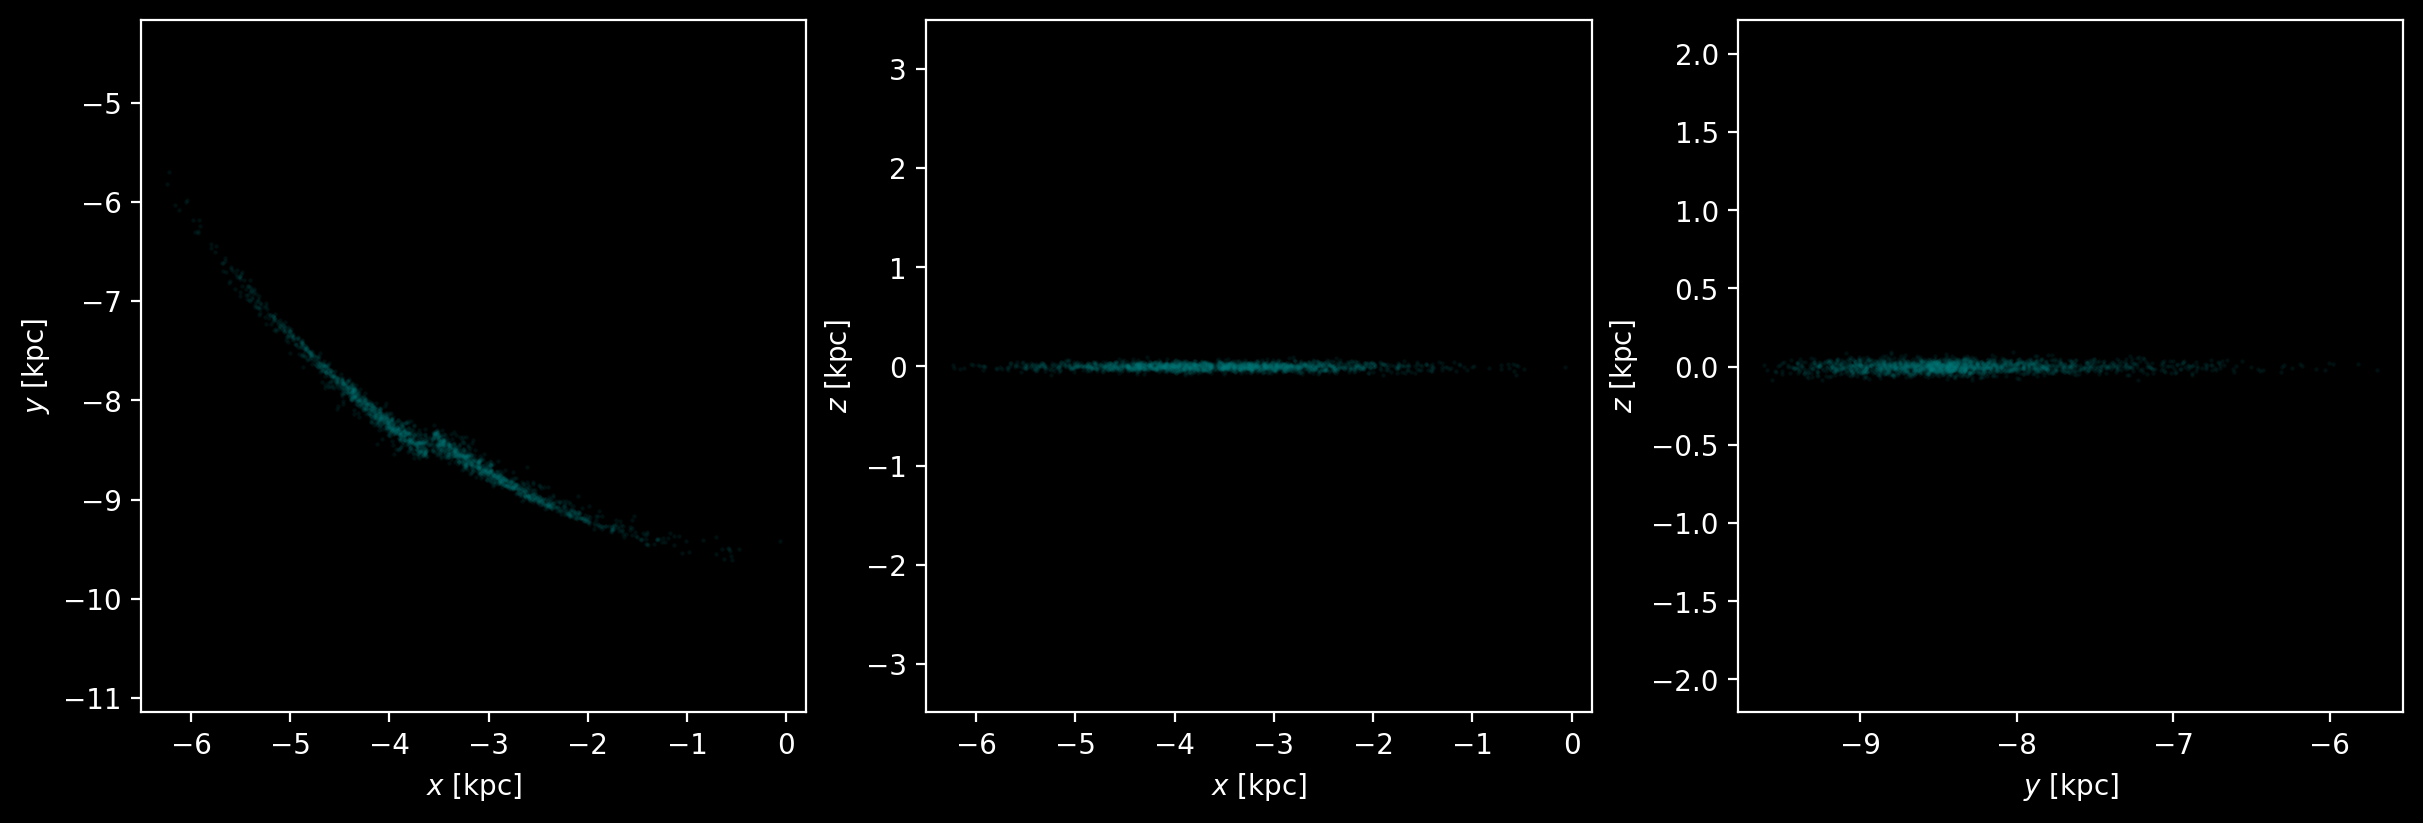

In [ ]:
#This sets the gravitational potential of the Milky Way galaxy, assuming some standard parameters for its mass and size.
pot = gp.NFWPotential.from_circular_velocity(v_c=220*u.km/u.s, r_s=15*u.kpc, units=galactic)
H = gp.Hamiltonian(pot)

#This sets the initial coordinates of the stream in position and velocity space
prog_w0 = gd.PhaseSpacePosition(pos=[adjustable_params['x'], adjustable_params['y'], adjustable_params['z']] * u.kpc,
                                vel=[adjustable_params['vx'], adjustable_params['vy'], adjustable_params['vz']] * u.km/u.s)

#This initializes the stream defined above and evolves it in the Milky Way potential
df = ms.FardalStreamDF()
gen = ms.MockStreamGenerator(df, H)
stream, prog = gen.run(prog_w0, adjustable_params['prog_mass'], dt=1 * u.Myr, n_steps=adjustable_params['age'])

#This plots the stream in your chosen color
stream.plot(color=adjustable_params['color'],alpha=0.1,s=1.5)
plt.show()

### 2. Test the Effects of Changing Stream Parameters

Next, you'll generate a custom stream to display on the VizLab. To gain intuition for how different stream properties affect the outcome, you'll explore how changing one of the following variables affects the outcome:

* 🔥 -- position (`x`, `y`, `z`)
* ⛰️ -- velocity (`vx`, `vy`, `vz`)
* 💨 -- mass (`prog_mass`)
* 🌊 -- age (`age`)
* Each group can also select their preferred color (`color`) from this [list](https://matplotlib.org/stable/_images/sphx_glr_named_colors_003_2_0x.png)

After experimenting with these changes, discuss the following questions as a group and choose a group member to share with the VizLab:

1. **Describe how changing your parameter affects the stream. For example, does it make it longer/shorter or thinner/thicker? Does it move the stream's position?**

2. **What do you think causes the effects described above? For example, why would making a stream older change its length, thickness, or position?**

*Note: try changing the values of your parameter(s) in small increments, e.g., by 10 kpc for positions, 10 km/s for velocities, and multiples of 2 for mass and age.*

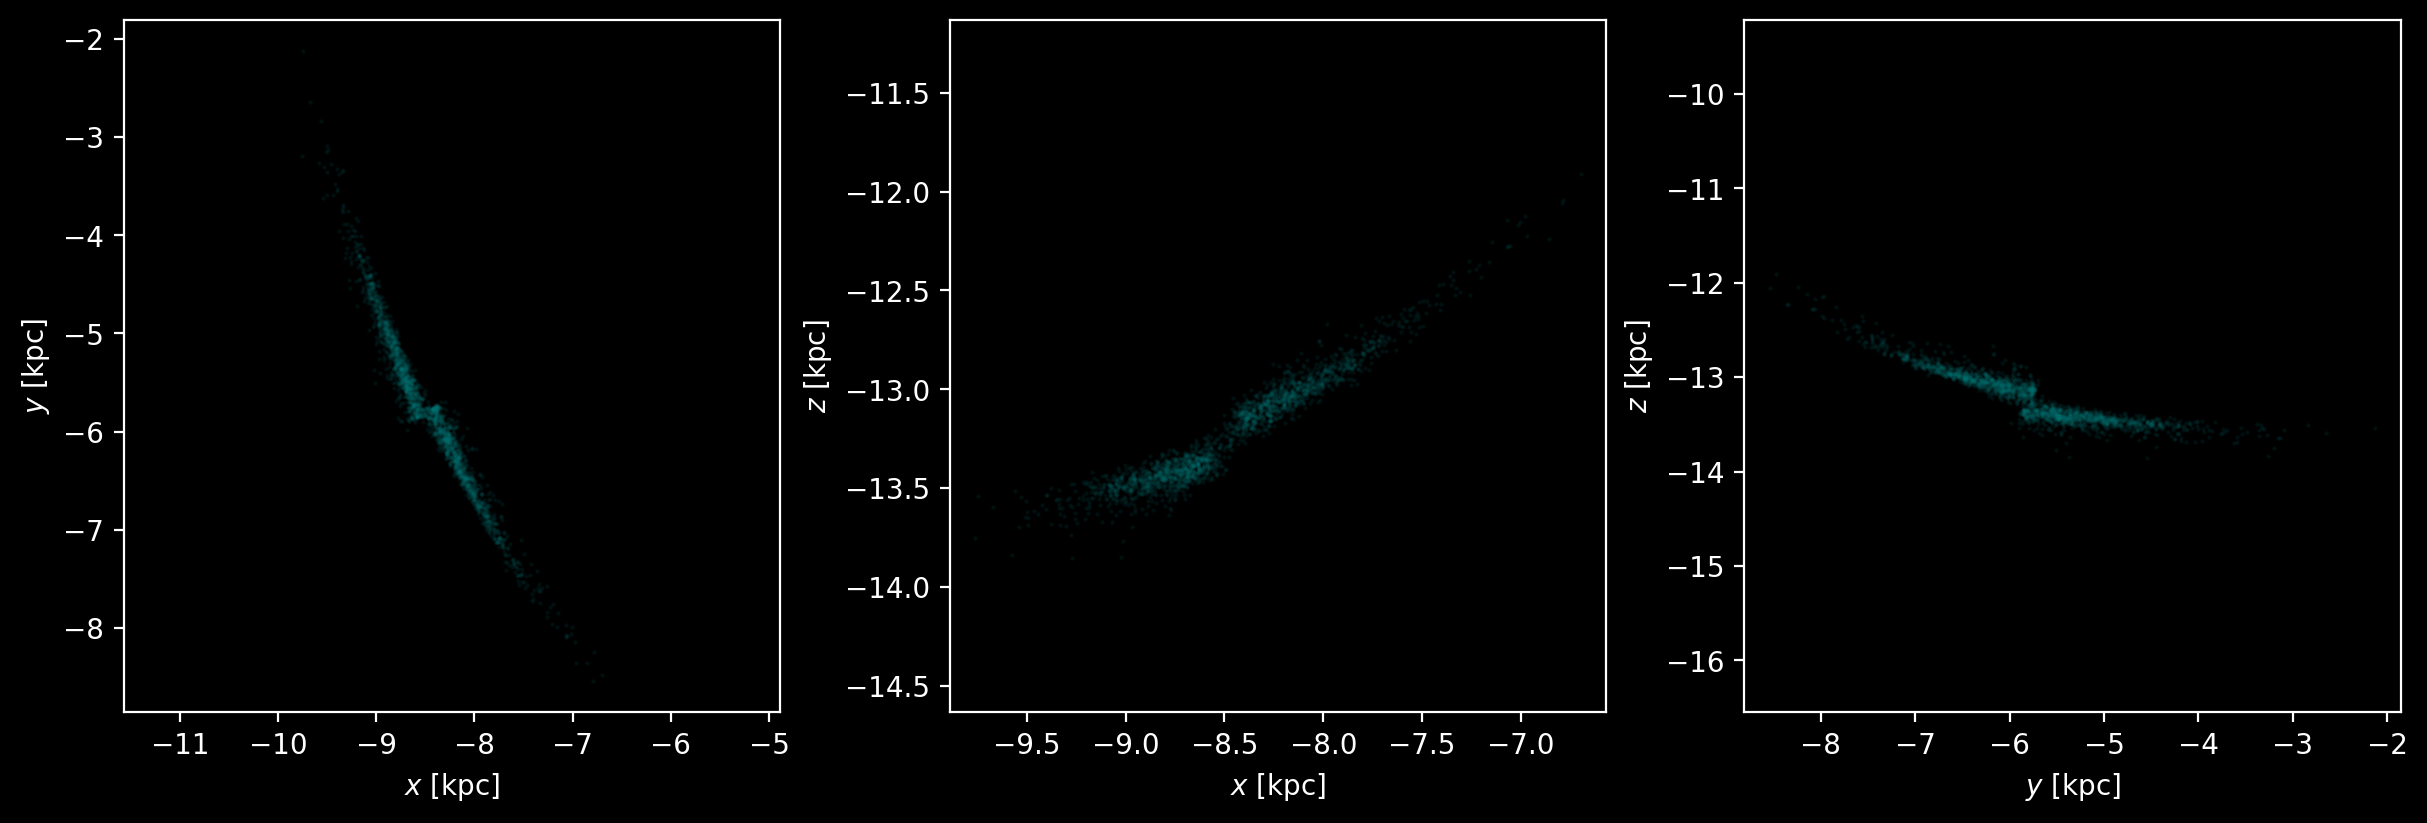

In [ ]:
### Your changes here ###

#Test the effects of changing your group's parameter(s) and color, then select your favorite values
adjustable_params = {}

adjustable_params['x'] = 10.
adjustable_params['y'] = 0.
adjustable_params['z'] = 13.

adjustable_params['vx'] = -50.
adjustable_params['vy'] = 170.
adjustable_params['vz'] = 0.

adjustable_params['prog_mass'] = 2.5*10**4 * u.Msun
adjustable_params['age'] = 1000

adjustable_params['color'] = 'teal'

### Leave the following code unchanged ###

#Create stream
pot = gp.NFWPotential.from_circular_velocity(v_c=220*u.km/u.s, r_s=15*u.kpc, units=galactic)
H = gp.Hamiltonian(pot)

prog_w0 = gd.PhaseSpacePosition(pos=[adjustable_params['x'], adjustable_params['y'], adjustable_params['z']] * u.kpc,
                                vel=[adjustable_params['vx'], adjustable_params['vy'], adjustable_params['vz']] * u.km/u.s)

df = ms.FardalStreamDF()

gen = ms.MockStreamGenerator(df, H)

my_stream, prog = gen.run(prog_w0, adjustable_params['prog_mass'], dt=1 * u.Myr, n_steps=adjustable_params['age'])

#Plot stream
my_stream.plot(color=adjustable_params['color'],alpha=0.1,s=1.5)
plt.show()

### 3. Convert your stream data to VizLab format

Run this cell to convert your stream to a data format that can be shown on the VizLab screen; then follow the instructions in part 4 to upload.

In [ ]:
rgb_color = mpl.colors.to_rgb(adjustable_params['color'])
Npoint = np.size(my_stream.pos.x)
r_array = np.ones(Npoint, dtype=c_ubyte) * int(rgb_color[0] * 255)
g_array = np.ones(Npoint, dtype=c_ubyte) * int(rgb_color[1] * 255)
b_array = np.ones(Npoint, dtype=c_ubyte) * int(rgb_color[2] * 255)

your_stream = pd.DataFrame(data={'x': np.array(my_stream.pos.x),
                                 'y': np.array(my_stream.pos.y),
                                 'z': np.array(my_stream.pos.z),
                                 'red': r_array,
                                 'green': g_array,
                                 'blue': b_array})

#Enter your name here:
your_name = 'ethan'

#Save your stream
cloud = PyntCloud(your_stream)
print(cloud)
cloud.to_file("{}_stream_{}.ply".format(your_name,adjustable_params['color']))

PyntCloud
2002 points with 3 scalar fields
0 faces in mesh
0 kdtrees
0 voxelgrids
Centroid: -3.563194811339225, -8.366629323853008, 0.0004787516065266282
Other attributes:



### 4. Upload stream to Google Drive for VizLab display

1. Download the "your_name_stream.ply" file from the left-hand panel: hover your mouse over it, click the three dots, and click "download" (note: it takes ~1 minute for the file to appear on the left-hand panel!).

2. Go to: https://drive.google.com/drive/folders/1-6ibYD_d1c93z4H3QEvHNLEej8ah0c4s?usp=sharing

3. Right-click, then click "file upload"; upload your stream data

## Optional Exercise: Plot known streams near the Milky Way

If you'd like to change the colors for the Disk, Sagittarius, and Magellanic Clouds, change 'binary', 'Reds', and 'Blues' to any of those listed here: https://matplotlib.org/stable/tutorials/colors/colormaps.html.

You can also change the variables that set color intensity --- for example, you could change `c=np.abs(stream_dict[stream]['z'].values)` in the `Disk` block to `c=np.abs(stream_dict[stream]['x'].values)`, and see how this affects the plot.

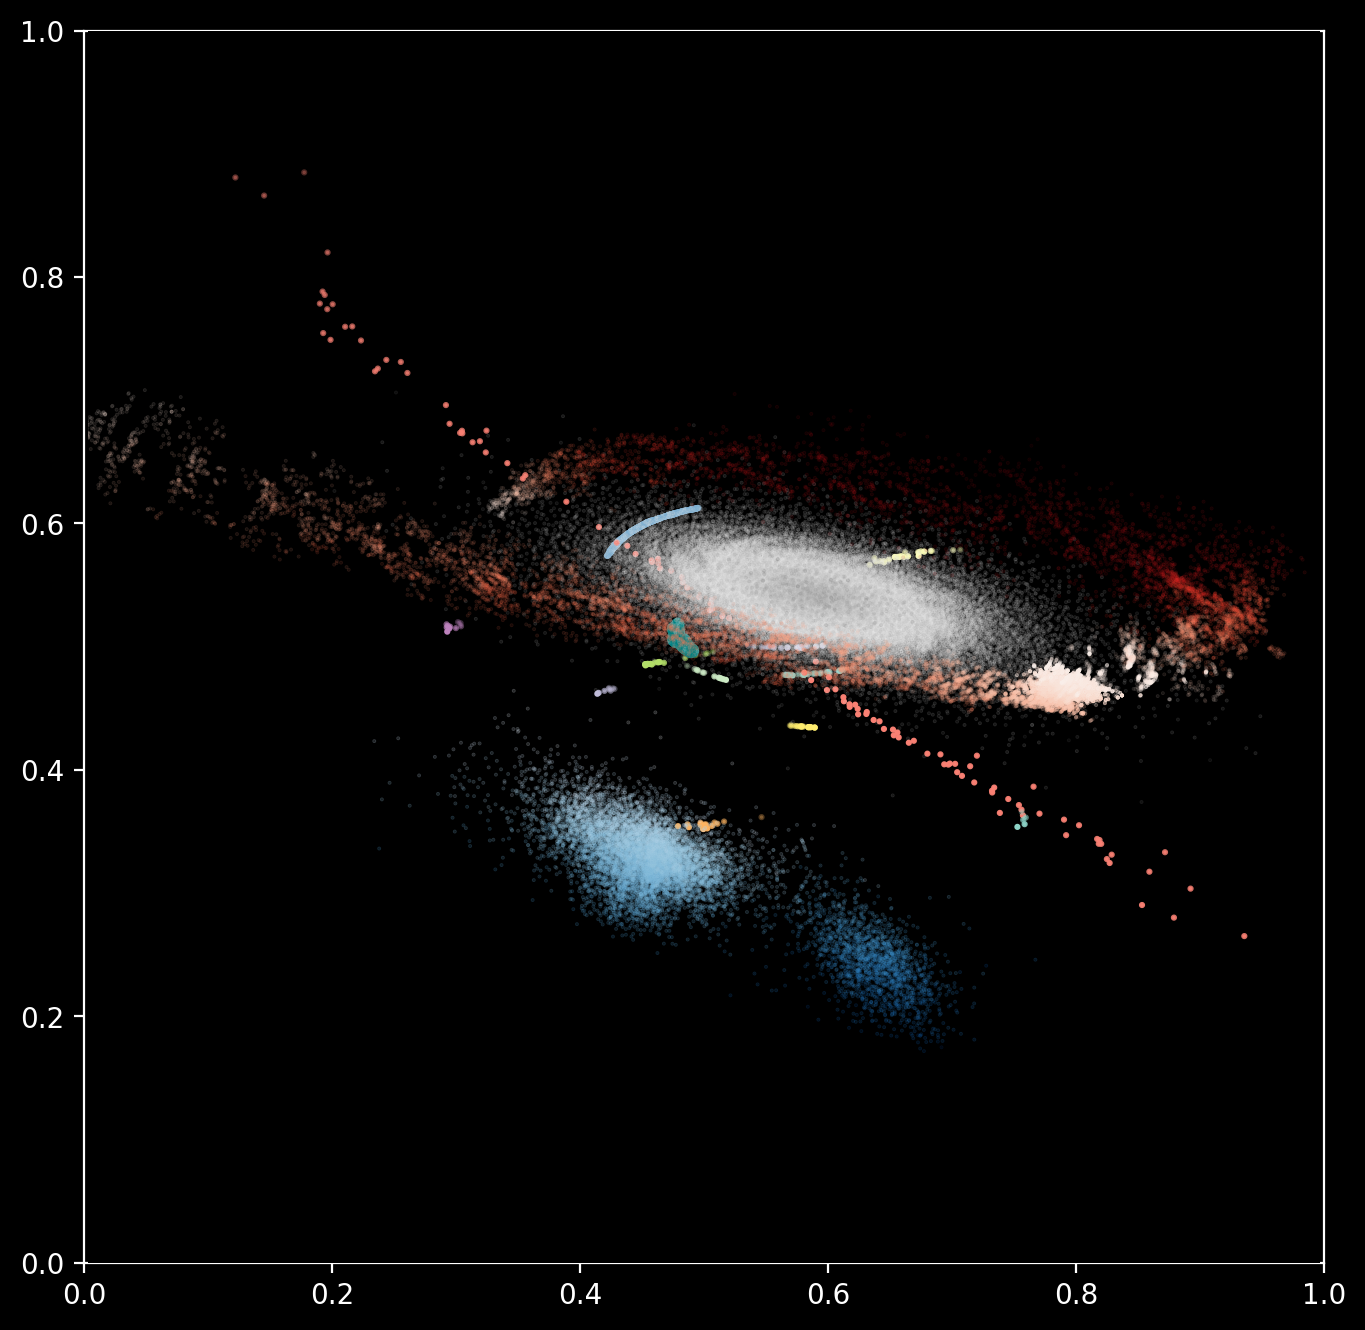

In [ ]:
#These colormaps can be changed!
disk_cmap = 'binary'
Sagittarius_cmap = 'Reds'
MagellanicClouds_cmap = 'Blues'

### Plot streams ###
fig, ax = plt.subplots(figsize=(8,8))
ax = plt.axes(projection='3d')

# Plot data for each three-dimensional stream
for stream in stream_dict:
  if stream == 'Disk':
    ax.scatter(stream_dict[stream]['x'].values, stream_dict[stream]['y'].values,stream_dict[stream]['z'].values,
               cmap=disk_cmap,c=np.abs(stream_dict[stream]['z'].values),s=0.15,alpha=0.15)
  elif stream == 'Sagittarius':
    ax.scatter(stream_dict[stream]['x'].values, stream_dict[stream]['y'].values,stream_dict[stream]['z'].values,
               cmap=Sagittarius_cmap,c=np.abs(stream_dict[stream]['z'].values),s=0.15,alpha=0.15)
  elif stream == 'MagellanicClouds':
    ax.scatter(stream_dict[stream]['x'].values, stream_dict[stream]['y'].values,stream_dict[stream]['z'].values,
               cmap=MagellanicClouds_cmap,c=np.abs(stream_dict[stream]['z'].values),s=0.15,alpha=0.25)
  else:
    ax.scatter(stream_dict[stream]['x'].values, stream_dict[stream]['y'].values,stream_dict[stream]['z'].values,s=1.5)

ax.scatter(my_stream.x,my_stream.y,my_stream.z,color=adjustable_params['color'],alpha=1.,s=15,zorder=999)

ax.set_xlim(-30,20)
ax.set_axis_off()

plt.show()